Implementare una rete neurale feedforward per la classificazione del dataset opdigits. In particolare, la rete dovrà apprendere sul dataset di training messo a disposizione. Dovrà essere fornita in output l’accuratezza totale sul training e sul test set

Import libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tensorflow import keras
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report

Load datasets using pandas

In [2]:
train_df = pd.read_csv("data/optdigits.tra", header=None)
test_df = pd.read_csv("data/optdigits.tes", header=None)
n_classes = 10

Split the datasets in train and test set

In [3]:
x_train = train_df.iloc[:, :-1]
y_train = train_df.iloc[:, -1]
x_test = test_df.iloc[:, :-1]
y_test = test_df.iloc[:, -1]

Perform Knn classification and record the accuracy for each k between 1 and 11

In [4]:
knn_y_predicted = {}
knn_reports = {}
for k in range(1, 15):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(x_train, y_train)
    knn_y_predicted[k] = knn.predict(x_test)
    knn_reports[k] = classification_report(y_test, knn_y_predicted[k], output_dict=True)

Compute the recall for each class choosing the best classifier


In [5]:
best_k = max(knn_reports, key = lambda k: knn_reports[k]["accuracy"])
knn_classes_recall = [knn_reports[best_k][k]["recall"] for k in knn_reports[best_k] if k.isdigit()]
knn_reports[best_k]

{'0': {'f1-score': 1.0, 'precision': 1.0, 'recall': 1.0, 'support': 178},
 '1': {'f1-score': 0.9653333333333334,
  'precision': 0.9378238341968912,
  'recall': 0.9945054945054945,
  'support': 182},
 '2': {'f1-score': 0.9943181818181819,
  'precision': 1.0,
  'recall': 0.9887005649717514,
  'support': 177},
 '3': {'f1-score': 0.9781420765027322,
  'precision': 0.9781420765027322,
  'recall': 0.9781420765027322,
  'support': 183},
 '4': {'f1-score': 0.9807162534435261,
  'precision': 0.978021978021978,
  'recall': 0.9834254143646409,
  'support': 181},
 '5': {'f1-score': 0.9862258953168045,
  'precision': 0.988950276243094,
  'recall': 0.9835164835164835,
  'support': 182},
 '6': {'f1-score': 1.0, 'precision': 1.0, 'recall': 1.0, 'support': 181},
 '7': {'f1-score': 0.9888268156424581,
  'precision': 0.9888268156424581,
  'recall': 0.9888268156424581,
  'support': 179},
 '8': {'f1-score': 0.956268221574344,
  'precision': 0.9704142011834319,
  'recall': 0.9425287356321839,
  'support': 1

Creation of the deep network using keras

In [6]:
ff_model = keras.Sequential([
    keras.layers.InputLayer(input_shape=(64,)),
    keras.layers.Dense(64, activation="relu"),
    keras.layers.Dense(64, activation="relu"),
    keras.layers.Dropout(0.3),
    keras.layers.Dense(n_classes, activation="softmax"),
])

ff_model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 64)                4160      
_________________________________________________________________
dense_1 (Dense)              (None, 64)                4160      
_________________________________________________________________
dropout (Dropout)            (None, 64)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 10)                650       
Total params: 8,970
Trainable params: 8,970
Non-trainable params: 0
_________________________________________________________________


One-hot encoding of the labels

In [7]:
y_train_categorical = keras.utils.to_categorical(y_train, n_classes)
y_test_categorical = keras.utils.to_categorical(y_test, n_classes)

Train the deep model

In [8]:
ff_model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])
ff_model.fit(x_train, y_train_categorical, epochs=64, batch_size=64, validation_split=0.2, shuffle=True)

Epoch 1/64
48/48 [==============================] - 1s 7ms/step - loss: 3.8135 - accuracy: 0.3107 - val_loss: 1.0717 - val_accuracy: 0.6863
Epoch 2/64
48/48 [==============================] - 0s 2ms/step - loss: 1.0171 - accuracy: 0.6763 - val_loss: 0.5241 - val_accuracy: 0.8588
Epoch 3/64
48/48 [==============================] - 0s 2ms/step - loss: 0.6128 - accuracy: 0.8064 - val_loss: 0.3166 - val_accuracy: 0.9124
Epoch 4/64
48/48 [==============================] - 0s 2ms/step - loss: 0.4546 - accuracy: 0.8574 - val_loss: 0.2325 - val_accuracy: 0.9281
Epoch 5/64
48/48 [==============================] - 0s 2ms/step - loss: 0.3495 - accuracy: 0.8927 - val_loss: 0.1892 - val_accuracy: 0.9529
Epoch 6/64
48/48 [==============================] - 0s 2ms/step - loss: 0.3071 - accuracy: 0.9045 - val_loss: 0.1643 - val_accuracy: 0.9582
Epoch 7/64
48/48 [==============================] - 0s 2ms/step - loss: 0.2430 - accuracy: 0.9271 - val_loss: 0.1442 - val_accuracy: 0.9608
Epoch 8/64
48/48 [==

Use the model to predict the label of the test set

In [9]:
ff_model_y_predicted_probabilities = ff_model.predict(x_test)
ff_model_y_predicted = np.argmax(ff_model_y_predicted_probabilities, axis=1)
ff_model_report = classification_report(y_test, ff_model_y_predicted, output_dict=True)
ff_model_report

{'0': {'f1-score': 0.9915966386554622,
  'precision': 0.9888268156424581,
  'recall': 0.9943820224719101,
  'support': 178},
 '1': {'f1-score': 0.9726775956284153,
  'precision': 0.967391304347826,
  'recall': 0.978021978021978,
  'support': 182},
 '2': {'f1-score': 0.9827586206896551,
  'precision': 1.0,
  'recall': 0.9661016949152542,
  'support': 177},
 '3': {'f1-score': 0.9467787114845938,
  'precision': 0.9712643678160919,
  'recall': 0.9234972677595629,
  'support': 183},
 '4': {'f1-score': 0.9807162534435261,
  'precision': 0.978021978021978,
  'recall': 0.9834254143646409,
  'support': 181},
 '5': {'f1-score': 0.9440000000000001,
  'precision': 0.917098445595855,
  'recall': 0.9725274725274725,
  'support': 182},
 '6': {'f1-score': 0.9860724233983287,
  'precision': 0.9943820224719101,
  'recall': 0.9779005524861878,
  'support': 181},
 '7': {'f1-score': 0.9473684210526316,
  'precision': 0.9938650306748467,
  'recall': 0.9050279329608939,
  'support': 179},
 '8': {'f1-score': 

Compute the recall of the ff model for each class 


In [10]:
ff_model_classes_recall = [ff_model_report[k]["recall"] for k in ff_model_report if k.isdigit()]
ff_model_classes_recall

[0.9943820224719101,
 0.978021978021978,
 0.9661016949152542,
 0.9234972677595629,
 0.9834254143646409,
 0.9725274725274725,
 0.9779005524861878,
 0.9050279329608939,
 0.9080459770114943,
 0.9833333333333333]

Load original datasets

In [11]:
def extract_dataset(path_to_file, n):

    x = []
    y = []
    first_row = 21
    size = 32 
    last_row = first_row + size

    with open(path_to_file, 'r') as f:
        lines = f.readlines()
        for i in range(1, n + 1):
            image = [[int(pixel) for pixel in line[:-1]] for line in lines[first_row:last_row]]
            x.append(image)
            y.append(int(lines[last_row][1]))
            first_row = last_row + 1;
            last_row = first_row + size;
    
    return x, y


x_train_orig, y_train_orig = extract_dataset("data/optdigits-orig.tra", 1934)
x_validation_orig, y_validation_orig = extract_dataset("data/optdigits-orig.cv", 946)
x_wdep_orig, y_wdep_orig = extract_dataset("data/optdigits-orig.wdep", 943)
x_windep_orig, y_windep_orig = extract_dataset("data/optdigits-orig.windep", 1797)

Merge optdigits-orig.tra and optdigits-orig.wdep to obtain the whole training set

In [12]:
x_train_orig += x_wdep_orig
y_train_orig += y_wdep_orig

One-hot encoding of the labels

In [13]:
y_train_orig_categorical = keras.utils.to_categorical(y_train_orig, n_classes)
y_windep_orig_categorical = keras.utils.to_categorical(y_windep_orig, n_classes)
y_validation_orig_categorical = keras.utils.to_categorical(y_validation_orig, n_classes)

Train the deep model

In [14]:
x_train_orig = np.expand_dims(x_train_orig, -1)
x_validation_orig = np.expand_dims(x_validation_orig, -1)
x_windep_orig = np.expand_dims(x_windep_orig, -1)

cnn_model = keras.Sequential([
    keras.layers.InputLayer(input_shape=(32, 32, 1)),
    keras.layers.Conv2D(32, kernel_size=(3, 3), activation="relu"),
    keras.layers.MaxPooling2D(pool_size=(2, 2)),
    keras.layers.Conv2D(64, kernel_size=(3, 3), activation="relu"),
    keras.layers.MaxPooling2D(pool_size=(2, 2)),
    keras.layers.Flatten(),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(n_classes, activation="softmax"),
])

cnn_model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 30, 30, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 13, 13, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 6, 6, 64)          0         
_________________________________________________________________
flatten (Flatten)            (None, 2304)              0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 2304)              0         
_________________________________________________________________
dense_3 (Dense)              (None, 10)               

In [15]:
cnn_model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])
cnn_model.fit(
    x_train_orig,
    y_train_orig_categorical,
    epochs=32,
    batch_size=64,
    validation_data=(x_validation_orig, y_validation_orig_categorical),
    shuffle=True
)

Epoch 1/32
45/45 [==============================] - 4s 79ms/step - loss: 1.1348 - accuracy: 0.6590 - val_loss: 0.2329 - val_accuracy: 0.9302
Epoch 2/32
45/45 [==============================] - 3s 75ms/step - loss: 0.2538 - accuracy: 0.9211 - val_loss: 0.1511 - val_accuracy: 0.9588
Epoch 3/32
45/45 [==============================] - 3s 75ms/step - loss: 0.1504 - accuracy: 0.9566 - val_loss: 0.1103 - val_accuracy: 0.9704
Epoch 4/32
45/45 [==============================] - 3s 74ms/step - loss: 0.1221 - accuracy: 0.9611 - val_loss: 0.1000 - val_accuracy: 0.9715
Epoch 5/32
45/45 [==============================] - 3s 74ms/step - loss: 0.0991 - accuracy: 0.9694 - val_loss: 0.0730 - val_accuracy: 0.9767
Epoch 6/32
45/45 [==============================] - 3s 74ms/step - loss: 0.0741 - accuracy: 0.9774 - val_loss: 0.0696 - val_accuracy: 0.9810
Epoch 7/32
45/45 [==============================] - 3s 74ms/step - loss: 0.0712 - accuracy: 0.9757 - val_loss: 0.0646 - val_accuracy: 0.9820
Epoch 8/32
45

Use the model to predict the label of the test set

In [16]:
cnn_model_y_predicted_probabilities = cnn_model.predict(x_windep_orig)
cnn_model_y_predicted = np.argmax(cnn_model_y_predicted_probabilities, axis=1)
cnn_model_report = classification_report(y_windep_orig, cnn_model_y_predicted, output_dict=True)
cnn_model_report

{'0': {'f1-score': 0.9916434540389973,
  'precision': 0.9834254143646409,
  'recall': 1.0,
  'support': 178},
 '1': {'f1-score': 0.9862258953168045,
  'precision': 0.988950276243094,
  'recall': 0.9835164835164835,
  'support': 182},
 '2': {'f1-score': 0.9971671388101983,
  'precision': 1.0,
  'recall': 0.9943502824858758,
  'support': 177},
 '3': {'f1-score': 0.9725274725274724,
  'precision': 0.9779005524861878,
  'recall': 0.9672131147540983,
  'support': 183},
 '4': {'f1-score': 0.9806094182825484,
  'precision': 0.9833333333333333,
  'recall': 0.9779005524861878,
  'support': 181},
 '5': {'f1-score': 0.9808219178082191,
  'precision': 0.9781420765027322,
  'recall': 0.9835164835164835,
  'support': 182},
 '6': {'f1-score': 0.9916897506925207,
  'precision': 0.9944444444444445,
  'recall': 0.988950276243094,
  'support': 181},
 '7': {'f1-score': 0.9655172413793103,
  'precision': 0.9940828402366864,
  'recall': 0.9385474860335196,
  'support': 179},
 '8': {'f1-score': 0.96275071633

Compute the recall of the cnn model for each class 

In [17]:
cnn_model_classes_recall = [cnn_model_report[k]["recall"] for k in cnn_model_report if k.isdigit()]
cnn_model_classes_recall

[1.0,
 0.9835164835164835,
 0.9943502824858758,
 0.9672131147540983,
 0.9779005524861878,
 0.9835164835164835,
 0.988950276243094,
 0.9385474860335196,
 0.9655172413793104,
 0.9777777777777777]

Bar Plot

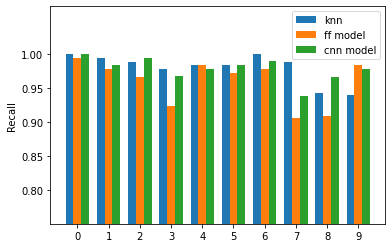

In [18]:
x = [i for i in range(0, n_classes)]
width = 0.25
fig, ax = plt.subplots()
ax.bar([clazz - width for clazz in x], knn_classes_recall, width, label="knn")
ax.bar([clazz for clazz in x], ff_model_classes_recall, width, label="ff model")
ax.bar([clazz + width for clazz in x], cnn_model_classes_recall, width, label="cnn model")
ax.set_ylabel("Recall")
ax.set_xticks(x)
ax.set_yticks([0.80, 0.85, 0.90, 0.95, 1])
ax.set_ylim([0.75, 1.07])
ax.legend()
plt.show()